In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
filename = 'data/athleteEventsNoPersonal.csv'
df = pd.read_csv(filename)
df.head()


,ID,Age,Height,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,5,21.0,185.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
1,5,21.0,185.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
2,5,25.0,185.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,Speed Skating Women's 500 metres,NaN
3,5,25.0,185.0,Netherlands,NED,1992 Winter,1992,Winter,Albertville,Speed Skating,"Speed Skating Women's 1,000 metres",NaN
4,5,27.0,185.0,Netherlands,NED,1994 Winter,1994,Winter,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
heightCountryYear = pd.DataFrame(df.groupby(['NOC', 'Year', 'ID'])['Height'].mean())

In [6]:
temp = heightCountryYear.reset_index().groupby(['NOC', 'Year'])['Height'].apply(list)
temp

NOC  Year
AFG  1936                                    [nan, nan]
     1948                          [nan, nan, nan, nan]
     1956                                    [nan, nan]
     1960                                       [170.0]
     1964                                  [nan, 160.0]
                                ...                    
ZIM  2000                         [176.0, 169.0, 178.0]
     2004           [176.0, 168.0, 182.0, 178.0, 190.0]
     2008                                [173.0, 176.0]
     2012                                       [176.0]
     2016    [176.0, 181.0, 163.0, 171.0, 159.0, 182.0]
Name: Height, Length: 2540, dtype: object

In [7]:
temp = temp.reset_index()
temp

,NOC,Year,Height
0,AFG,1936,"[nan, nan]"
1,AFG,1948,"[nan, nan, nan, nan]"
2,AFG,1956,"[nan, nan]"
3,AFG,1960,[170.0]
4,AFG,1964,"[nan, 160.0]"
...,...,...,...
2535,ZIM,2000,"[176.0, 169.0, 178.0]"
2536,ZIM,2004,"[176.0, 168.0, 182.0, 178.0, 190.0]"
2537,ZIM,2008,"[173.0, 176.0]"
2538,ZIM,2012,[176.0]


In [63]:
# np.isnan(x) evalúa si los valores del array son nan y los reemplaza por True, caso contrario False
# de este modo, devuelve un array con elementos de tipo bool y longitud igual a x.
#
# .any() en np.isnan(x).any() evalúa si al menos uno de los elementos de x es nan devuelve False,
# caso contrario devuelve True.

# Eliminar cualquier país en un año determinado con participantes que no tuvieran estatura
nanFilter = temp.loc[:, 'Height'].apply(lambda x: np.logical_not(np.isnan(x).any()))
# filtrar USA
usFilter = temp['NOC'] == 'USA'
np.logical_not(np.isnan([True,False,np.log(-1)]).any())

C:\Users\Orlando\AppData\Local\Temp/ipykernel_23848/1219915889.py:11: RuntimeWarning: invalid value encountered in log
  np.logical_not(np.isnan([True,False,np.log(-1)]).any())


False

In [64]:
nanFilter & usFilter 

0       False
1       False
2       False
3       False
4       False
        ...  
2535    False
2536    False
2537    False
2538    False
2539    False
Length: 2540, dtype: bool

In [65]:
yearHeight = temp.loc[nanFilter & usFilter , :]
yearHeight

,NOC,Year,Height
2431,USA,1964,"[163.0, 186.0, 185.0, 157.0, 168.0, 185.0, 175..."
2432,USA,1968,"[198.0, 185.0, 157.0, 188.0, 183.0, 191.0, 180..."
2435,USA,1980,"[186.0, 185.0, 175.0, 180.0, 193.0, 168.0, 170..."
2438,USA,1992,"[188.0, 170.0, 180.0, 173.0, 173.0, 183.0, 176..."
2441,USA,1998,"[178.0, 170.0, 188.0, 180.0, 183.0, 183.0, 185..."
2442,USA,2000,"[202.0, 172.0, 186.0, 164.0, 173.0, 190.0, 183..."
2443,USA,2002,"[178.0, 170.0, 185.0, 175.0, 183.0, 180.0, 167..."
2444,USA,2004,"[172.0, 170.0, 193.0, 180.0, 173.0, 193.0, 203..."
2445,USA,2006,"[178.0, 185.0, 180.0, 188.0, 180.0, 165.0, 180..."
2446,USA,2008,"[163.0, 170.0, 172.0, 193.0, 183.0, 173.0, 203..."


In [66]:
yearHeight['Year'].values

array([1964, 1968, 1980, 1992, 1998, 2000, 2002, 2004, 2006, 2008, 2010,
       2012, 2014, 2016], dtype=int64)

In [67]:
yearHeight['Height'].values[0]

[163.0,
 186.0,
 185.0,
 157.0,
 168.0,
 185.0,
 175.0,
 175.0,
 196.0,
 168.0,
 191.0,
 196.0,
 180.0,
 156.0,
 180.0,
 186.0,
 183.0,
 170.0,
 191.0,
 178.0,
 166.0,
 193.0,
 187.0,
 191.0,
 160.0,
 183.0,
 175.0,
 190.0,
 171.0,
 175.0,
 180.0,
 175.0,
 180.0,
 175.0,
 178.0,
 175.0,
 165.0,
 173.0,
 180.0,
 196.0,
 200.0,
 180.0,
 180.0,
 188.0,
 167.0,
 169.0,
 166.0,
 188.0,
 177.0,
 161.0,
 170.0,
 180.0,
 161.0,
 183.0,
 189.0,
 175.0]

1964
1968
1980
1992
1998
2000
2002
2004
2006
2008
2010
2012
2014
2016


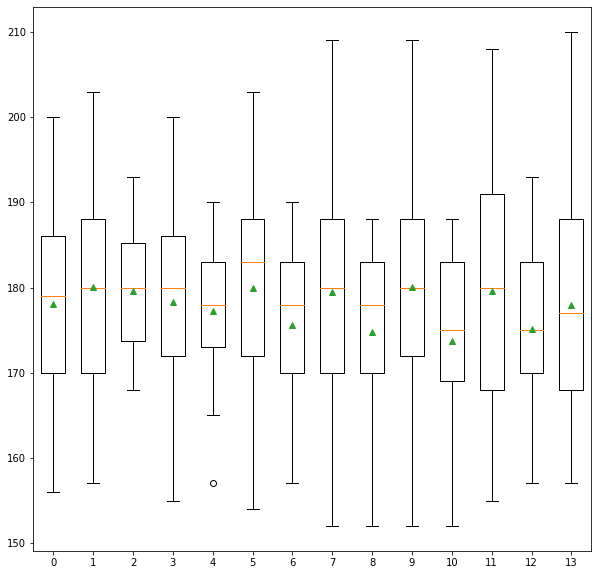

In [101]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
for index, heights in enumerate(yearHeight['Height'].values):
    print (yearHeight['Year'].values[index])
    ax.boxplot(yearHeight['Height'].values[index], 
                positions=[index],
                widths=0.6,
                showmeans=True)



[163.0, 186.0, 185.0, 157.0, 168.0, 185.0, 175.0, 175.0, 196.0, 168.0, 191.0, 196.0, 180.0, 156.0, 180.0, 186.0, 183.0, 170.0, 191.0, 178.0, 166.0, 193.0, 187.0, 191.0, 160.0, 183.0, 175.0, 190.0, 171.0, 175.0, 180.0, 175.0, 180.0, 175.0, 178.0, 175.0, 165.0, 173.0, 180.0, 196.0, 200.0, 180.0, 180.0, 188.0, 167.0, 169.0, 166.0, 188.0, 177.0, 161.0, 170.0, 180.0, 161.0, 183.0, 189.0, 175.0, [...], [...]]
[198.0, 185.0, 157.0, 188.0, 183.0, 191.0, 180.0, 183.0, 186.0, 196.0, 175.0, 186.0, 201.0, 183.0, 201.0, 178.0, 168.0, 170.0, 191.0, 180.0, 173.0, 183.0, 203.0, 165.0, 186.0, 170.0, 173.0, 188.0, 167.0, 203.0, 188.0, 181.0, 160.0, 191.0, 191.0, 175.0, 160.0, 183.0, 175.0, 165.0, 177.0, 196.0, 178.0, 175.0, 177.0, 175.0, 191.0, 180.0, 186.0, 170.0, 163.0, 175.0, 198.0, 188.0, 166.0, 165.0, 173.0, 180.0, 178.0, 170.0, 193.0, 170.0, 186.0, 183.0, 161.0, 178.0, 170.0, 161.0, 187.0, 170.0, 188.0, 193.0, [...], [...]]
[186.0, 185.0, 175.0, 180.0, 193.0, 168.0, 170.0, 180.0, [...], [...]]
[18

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


TypeError: unsupported operand type(s) for +: 'float' and 'list'

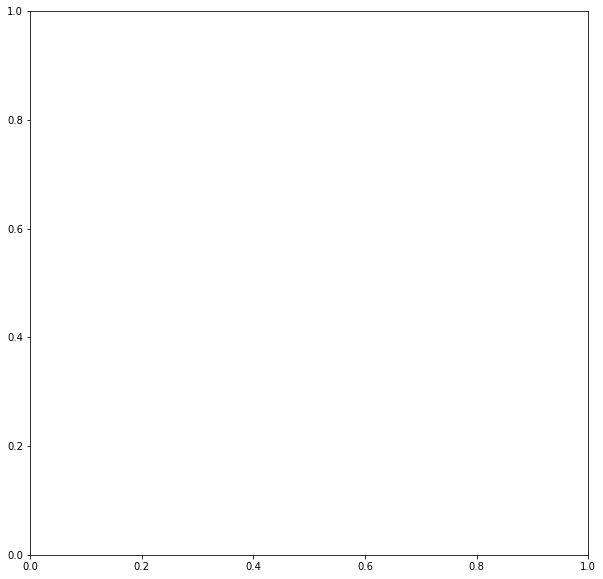

In [107]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
heights = []
positions = []
for index, heights in enumerate(yearHeight['Height'].values):
    print (yearHeight['Height'].values[index])
    positions.append(index)
print(heights)

ax.boxplot(heights, 
                positions=positions,
                widths=0.6,
                showmeans=True)
